<a href="https://colab.research.google.com/github/Luensmann/Bachelorarbeit/blob/main/Evaluation/Eval_multiCorpipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import AutoTokenizer, BertForTokenClassification, AutoModelForTokenClassification
from datasets import load_dataset

In [ ]:
# labels

labels = ['O', 'B-Gene_Protein', 'I-Gene_Protein', 'B-DNAMutation', 'I-DNAMutation', 'B-ProteinMutation', 'I-ProteinMutation', 'B-SNP', 'I-SNP', 'B-DNA_modification', 'I-DNA_modification', 'B-RNA', 'I-RNA', 'B-RNA_Mutation', 'I-RNA_Mutation', 'B-locus', 'I-locus', 'B-disease', 'I-disease', 'B-body-part', 'I-body-part', 'B-mutation', 'I-mutation', 'B-Physiology', 'I-Physiology', 'B-cohort-patient', 'I-cohort-patient', 'B-size', 'I-size', 'B-gender', 'I-gender', 'B-age', 'I-age', 'B-Concepts_Ideas', 'I-Concepts_Ideas', 'B-Disorder', 'I-Disorder', 'B-Phenomena', 'I-Phenomena', 'B-ethnicity', 'I-ethnicity']

label2id = {'B-Concepts_Ideas': 33,
             'B-DNAMutation': 3,
             'B-DNA_modification': 9,
             'B-Disorder': 35,
             'B-Gene_Protein': 1,
             'B-Phenomena': 37,
             'B-Physiology': 23,
             'B-ProteinMutation': 5,
             'B-RNA': 11,
             'B-RNA_Mutation': 13,
             'B-SNP': 7,
             'B-age': 31,
             'B-body-part': 19,
             'B-cohort-patient': 25,
             'B-disease': 17,
             'B-ethnicity': 39,
             'B-gender': 29,
             'B-locus': 15,
             'B-mutation': 21,
             'B-size': 27,
             'I-Concepts_Ideas': 34,
             'I-DNAMutation': 4,
             'I-DNA_modification': 10,
             'I-Disorder': 36,
             'I-Gene_Protein': 2,
             'I-Phenomena': 38,
             'I-Physiology': 24,
             'I-ProteinMutation': 6,
             'I-RNA': 12,
             'I-RNA_Mutation': 14,
             'I-SNP': 8,
             'I-age': 32,
             'I-body-part': 20,
             'I-cohort-patient': 26,
             'I-disease': 18,
             'I-ethnicity': 40,
             'I-gender': 30,
             'I-locus': 16,
             'I-mutation': 22,
             'I-size': 28,
             'O': 0}
id2label = {0: 'O',
             1: 'B-Gene_Protein',
             2: 'I-Gene_Protein',
             3: 'B-DNAMutation',
             4: 'I-DNAMutation',
             5: 'B-ProteinMutation',
             6: 'I-ProteinMutation',
             7: 'B-SNP',
             8: 'I-SNP',
             9: 'B-DNA_modification',
             10: 'I-DNA_modification',
             11: 'B-RNA',
             12: 'I-RNA',
             13: 'B-RNA_Mutation',
             14: 'I-RNA_Mutation',
             15: 'B-locus',
             16: 'I-locus',
             17: 'B-disease',
             18: 'I-disease',
             19: 'B-body-part',
             20: 'I-body-part',
             21: 'B-mutation',
             22: 'I-mutation',
             23: 'B-Physiology',
             24: 'I-Physiology',
             25: 'B-cohort-patient',
             26: 'I-cohort-patient',
             27: 'B-size',
             28: 'I-size',
             29: 'B-gender',
             30: 'I-gender',
             31: 'B-age',
             32: 'I-age',
             33: 'B-Concepts_Ideas',
             34: 'I-Concepts_Ideas',
             35: 'B-Disorder',
             36: 'I-Disorder',
             37: 'B-Phenomena',
             38: 'I-Phenomena',
             39: 'B-ethnicity',
             40: 'I-ethnicity'}

In [ ]:
dataset = load_dataset("Brizape/multiCorp_tokenized_split_0404_dev")
dataset

Found cached dataset parquet (C:/Users/pc/.cache/huggingface/datasets/Brizape___parquet/Brizape--multiCorp_tokenized_split_0404_dev-beb303d11c31fea1/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5165
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2035
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1293
    })
})

In [ ]:
# get all texts for predictions
texts = []
for item in dataset["test"]:
    texts.append(item["texts"])
print(len(texts))

2035


In [ ]:
# get all gold labels aka true labels
gold_id_all = []
for item in dataset["test"]:
    #gold_id_all.append([id2label[i] for i in item["labels"][1:-1]])
    gold_id_all.append(item["labels"][1:-1])
print(len(gold_id_all))

2035


In [ ]:
# convert all IDs into labels
gold_label_all = []
for item in gold_id_all:
    gold_label_all.append([id2label[i] for i in item])
print(len(gold_label_all))

2035


In [ ]:
saveName = "all_label_2e-05_0404_ES2_strict_tok"
model = "Brizape/MultiCorp_" + saveName
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForTokenClassification.from_pretrained(model)

In [ ]:
# gold_id_all - expected outputs in ids-format
# gold_label_all - expected outputs in label-format
# pred_label_all - all predicted labels in label-format
# pred_id_all - all predicted labels in id-format

# del all missmatches in both list:
# gold_id - expected outputs in ids-format
# gold_label - expected outputs in label-format
# pred_label - all predicted labels in label-format
# pred_id - all predicted labels in id-format

# gold_label_norm - normalisation; removed prefix
# pred_label_norm - normalisation; removed prefix

# y_true - for sklearn, no sublists
# y-pred - for sklearn, no sublists

In [ ]:
def predict(text):
    
    inputs = tokenizer(text, add_special_tokens=False, truncation=True, max_length=512, return_tensors="pt")
    if inputs['input_ids'].numel() == 0:
        print("input_ids is empty")
        return []
    
    with torch.no_grad():
        logits = model(**inputs).logits 
    predictions = torch.argmax(logits, dim=2)
    
    predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]

    return predicted_token_class

In [ ]:
# predict all text
pred_label_all = []
for index, text in enumerate(texts):
    print(index, end=' ')
    pred_label_all.append(predict(text))
len(pred_label_all)

0 1 2 input_ids is empty
3 4 5 input_ids is empty
6 7 8 input_ids is empty
9 10 11 input_ids is empty
12 13 14 input_ids is empty
15 16 17 input_ids is empty
18 19 20 input_ids is empty
21 22 23 input_ids is empty
24 25 26 input_ids is empty
27 28 29 input_ids is empty
30 31 32 input_ids is empty
33 34 35 input_ids is empty
36 37 38 input_ids is empty
39 40 41 input_ids is empty
42 43 44 input_ids is empty
45 46 47 input_ids is empty
48 49 50 input_ids is empty
51 52 53 input_ids is empty
54 55 56 input_ids is empty
57 58 59 input_ids is empty
60 61 62 input_ids is empty
63 64 65 input_ids is empty
66 67 68 input_ids is empty
69 70 71 input_ids is empty
72 73 74 input_ids is empty
75 76 77 input_ids is empty
78 79 80 input_ids is empty
81 82 83 input_ids is empty
84 85 86 input_ids is empty
87 88 89 input_ids is empty
90 91 92 input_ids is empty
93 94 95 input_ids is empty
96 97 98 input_ids is empty
99 100 101 input_ids is empty
102 103 104 input_ids is empty
105 106 107 input_ids is 

2035

In [ ]:
# delete all special token
for i, (pred, gold) in enumerate(zip(pred_label_all, gold_label_all)):
    if len(pred) == 512:
        for pred_tag, gold_tag in zip(pred, gold):
            print(pred_tag, gold_tag)
        pred_label_all[i] = pred[1:-1]
        #print(pred)

In [ ]:
# convert all IDs into labels

pred_id_all = []
for item in pred_label_all:
    pred_id_all.append([label2id[i] for i in item])
len(pred_id_all)

2035

In [ ]:
# checking if all gold and pred are same len
# reutrn list with indices of all missmatches
def check_len(gold, pred):
    missmatch_index = []
    for index, (gold, pred) in enumerate(zip(gold, pred)):
        if len(gold)==len(pred):
            #print("yes")
            continue
        else:
            missmatch_index.append(index)
    print("indices to del:" + str(missmatch_index))
    return missmatch_index

In [ ]:
# delete all missmatches from both sets
def del_missmatches(list1, list2, indices_to_del):
    for index in sorted(indices_to_del, reverse=True):
            del list1[index]
            del list2[index]

In [ ]:
# copy _all files
gold_id = gold_id_all[:]
gold_label = gold_label_all[:]
pred_id = pred_id_all[:]
pred_label = pred_label_all[:]
all = [gold_id, gold_label, pred_id, pred_label]
print('len befor:')
for list in all:
    print(len(list))
# get indicies with missmatch
# and delete them from both sets
indices_to_del = check_len(gold_id, pred_id)
del_missmatches(gold_id , pred_id, indices_to_del)
del_missmatches(gold_label , pred_label, indices_to_del)
print('len after:')
for list in all:
    print(len(list))
    


len befor:
2035
2035
2035
2035
indices to del:[794]
len after:
2034
2034
2034
2034


In [ ]:
############################################################
######################### seqeval ##########################
############################################################

In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from seqeval.scheme import IOB2

In [ ]:
# generate metrics
print("\n")
print("-"*60 + "\n" + "    SeqEval strict\n" + "-"*60)
print("strict: \n" + classification_report(gold_label, pred_label, scheme=IOB2, mode='strict'))

print("\n")
print("-"*60 + "\n" + "    SeqEval default\n" + "-"*60)
print("default: \n" + classification_report(gold_label, pred_label))



------------------------------------------------------------
    SeqEval strict
------------------------------------------------------------


C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


strict: 
                 precision    recall  f1-score   support

 Concepts_Ideas       0.00      0.00      0.00        34
    DNAMutation       0.56      0.01      0.02       487
       Disorder       0.00      0.00      0.00        67
   Gene_Protein       0.47      0.42      0.45       746
      Phenomena       0.00      0.00      0.00         6
     Physiology       0.00      0.00      0.00        40
ProteinMutation       0.00      0.00      0.00       228
            RNA       0.00      0.00      0.00         1
   RNA_Mutation       0.00      0.00      0.00         2
            SNP       0.00      0.00      0.00       204
            age       0.00      0.00      0.00         9
      body-part       0.00      0.00      0.00        79
 cohort-patient       0.41      0.32      0.36       228
        disease       0.23      0.33      0.27       253
      ethnicity       0.00      0.00      0.00         4
         gender       0.00      0.00      0.00         7
          locus      

In [ ]:
# save reports as csv
import pandas as pd
report = pd.DataFrame(classification_report(gold_label, pred_label, mode='strict', digits=2, output_dict=True)).transpose()
print(report)
df = pd.DataFrame(report)#.transpose()
# With a Sheet Name
file_name = "multiCorpus" + saveName
report.to_excel('multiCorpus\ ' + saveName + '.xlsx', index=True)

                 precision    recall  f1-score  support
Concepts_Ideas    0.000000  0.000000  0.000000     34.0
DNAMutation       0.555556  0.010267  0.020161    487.0
Disorder          0.000000  0.000000  0.000000     67.0
Gene_Protein      0.467552  0.424933  0.445225    746.0
Phenomena         0.000000  0.000000  0.000000      6.0
Physiology        0.000000  0.000000  0.000000     40.0
ProteinMutation   0.000000  0.000000  0.000000    228.0
RNA               0.000000  0.000000  0.000000      1.0
RNA_Mutation      0.000000  0.000000  0.000000      2.0
SNP               0.000000  0.000000  0.000000    204.0
age               0.000000  0.000000  0.000000      9.0
body-part         0.000000  0.000000  0.000000     79.0
cohort-patient    0.413793  0.315789  0.358209    228.0
disease           0.232687  0.332016  0.273616    253.0
ethnicity         0.000000  0.000000  0.000000      4.0
gender            0.000000  0.000000  0.000000      7.0
locus             0.000000  0.000000  0.000000  

In [ ]:
#######################################################
####################### sklearn #######################
#######################################################

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
import evaluate

In [ ]:
y_pred = []
for sublist in pred_id:
    for label in sublist:
        y_pred.append(label)
len(y_pred)

197065

In [ ]:
y_true = []
for sublist in gold_id:
    for label in sublist:
        y_true.append(label)
len(y_true)

197065

In [ ]:
print(unique_labels(y_pred))
print(unique_labels(y_true))

[ 0  1  2  3  4  8 17 21 22 24 25 28 32]
[ 0  1  2  3  4  5  6  7  8 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
confusion_matrix(y_true, y_pred, labels=[i for i in range(41)])

array([[189606,    215,    134, ...,      0,      0,      0],
       [   352,    355,     36, ...,      0,      0,      0],
       [   460,     13,    298, ...,      0,      0,      0],
       ...,
       [    19,      3,      0, ...,      0,      0,      0],
       [     3,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [ ]:
def plot(freal, predicted_token_class, label_list):
    label_names = labels #unique_labels(y_true)
    columns = [f'Pred{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=[i for i in range(41)]), columns=columns, index=index)
    return table

In [ ]:
plot = plot(y_true, y_pred, labels)
print(plot)
df = pd.DataFrame(plot)#.transpose()
df.to_excel('multiCorpus\ ' + saveName + 'confusion_.xlsx', index=True)

                     PredO  PredB-Gene_Protein  PredI-Gene_Protein  \
O                   189606                 215                 134   
B-Gene_Protein         352                 355                  36   
I-Gene_Protein         460                  13                 298   
B-DNAMutation          292                  25                   1   
I-DNAMutation          476                   2                   0   
B-ProteinMutation      156                   1                   0   
I-ProteinMutation      225                   2                   0   
B-SNP                  114                   0                   0   
I-SNP                  220                   0                   0   
B-DNA_modification       0                   0                   0   
I-DNA_modification       0                   0                   0   
B-RNA                    1                   0                   0   
I-RNA                    1                   1                   1   
B-RNA_Mutation      

In [ ]:
labels_heat = ['O', 'B-Gene_Protein', 'I-Gene_Protein', 'B-DNAMutation', 'I-DNAMutation', 'B-ProteinMutation', 'I-ProteinMutation', 'B-SNP', 'I-SNP']

In [ ]:
def plot_heat(freal, predicted_token_class, label_list):
    label_names = label_list #unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels= [i for i in range(9)]), columns=columns, index=index)
    figsize=(100,100)
    return sns.heatmap(table, annot=True, fmt='d', vmax=510, cmap='YlOrBr')

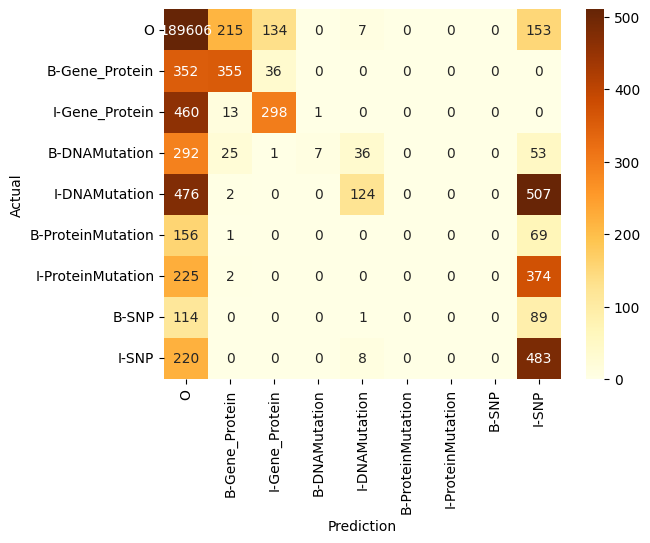

In [ ]:
ax = plot_heat(y_true, y_pred, labels_heat)
ax.set(xlabel="Prediction", ylabel="Actual")
ax.figure.savefig("output.png")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_true, y_pred, labels=[i for i in range(41)], target_names = labels, output_dict=True)
print(report)
df = pd.DataFrame(report).transpose()
df.to_csv('multiCorpus\ ' + saveName + '_label_report.csv') 
print("\n")
print("-"*60 + "\n" + "    Label Report\n" + "-"*60)
print(df)

{'O': {'precision': 0.9818040596520299, 'recall': 0.9970709338830371, 'f1-score': 0.9893786053647045, 'support': 190163}, 'B-Gene_Protein': {'precision': 0.523598820058997, 'recall': 0.47587131367292224, 'f1-score': 0.4985955056179775, 'support': 746}, 'I-Gene_Protein': {'precision': 0.5924453280318092, 'recall': 0.3855109961190168, 'f1-score': 0.46708463949843254, 'support': 773}, 'B-DNAMutation': {'precision': 0.7777777777777778, 'recall': 0.014373716632443531, 'f1-score': 0.028225806451612902, 'support': 487}, 'I-DNAMutation': {'precision': 0.6631016042780749, 'recall': 0.1084864391951006, 'f1-score': 0.18646616541353384, 'support': 1143}, 'B-ProteinMutation': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 228}, 'I-ProteinMutation': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 602}, 'B-SNP': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 204}, 'I-SNP': {'precision': 0.2772675086107922, 'recall': 0.679324894514768, 'f1-score': 0.39380350

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [ ]:
exl = pd.DataFrame()


report = classification_report(y_true, y_pred, labels=[i for i in range(41)], target_names = labels, output_dict=True)
print(report)
df = pd.DataFrame(report).transpose()
print("\n")
print("-"*60 + "\n" + "    Label Report\n" + "-"*60)
print(df)
exl = exl.append(df, ignore_index=True)
exl.to_excel('multiCorpus\ ' + saveName + '_labelReport.xlsx', index=True)#.transpose()

{'O': {'precision': 0.9818040596520299, 'recall': 0.9970709338830371, 'f1-score': 0.9893786053647045, 'support': 190163}, 'B-Gene_Protein': {'precision': 0.523598820058997, 'recall': 0.47587131367292224, 'f1-score': 0.4985955056179775, 'support': 746}, 'I-Gene_Protein': {'precision': 0.5924453280318092, 'recall': 0.3855109961190168, 'f1-score': 0.46708463949843254, 'support': 773}, 'B-DNAMutation': {'precision': 0.7777777777777778, 'recall': 0.014373716632443531, 'f1-score': 0.028225806451612902, 'support': 487}, 'I-DNAMutation': {'precision': 0.6631016042780749, 'recall': 0.1084864391951006, 'f1-score': 0.18646616541353384, 'support': 1143}, 'B-ProteinMutation': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 228}, 'I-ProteinMutation': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 602}, 'B-SNP': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 204}, 'I-SNP': {'precision': 0.2772675086107922, 'recall': 0.679324894514768, 'f1-score': 0.39380350

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [ ]:
i = 0
for (pred, gold, inIDs) in zip(pred_label, gold_label, dataset['test']['input_ids']):
    print(i, len(pred), len(inIDs[1:-1]), end="\n")
    i = i+1
    for i, (label1, label2, inID) in enumerate(zip(pred, gold, inIDs[1:-1])):
        print(i, tokenizer.decode(inID), ":(" + str(label1), ",", label2 + ')')
        if label1 != label2:
            print("#########################")
            #print(":(" + str(label1), ",", label2, end=')\n')
    print(" ")
    